<center><h3>Polynomial Regression</h3></center>

<h5>Importing necessary libraries</h5>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

<h5>Importing data file</h5>

In [45]:
file_path = 'data.csv'

<h5>Reading and creating data frame</h5>

In [47]:
data = pd.read_csv(file_path)

In [49]:
data.head()

,x,y
0,1.409445,5.275026
1,-9.337377,212.625146
2,-6.951291,124.721516
3,3.781497,20.279580
4,-5.841269,93.034061


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [55]:
data.describe()

,x,y
count,1000.000000,1000.000000
mean,-0.027201,73.613661
std,5.850491,63.767035
min,-9.988547,-9.299270
25%,-5.061974,18.132173
50%,-0.135796,54.387525
75%,4.987739,122.281817
max,9.991836,237.950299


<h5>Extracting x and y values</h5>

In [57]:
x = data['x'].values.reshape(-1, 1)
y = data['y'].values

<h5>Specifying the degree</h5>

In [59]:
degree = 3

<h5>Splitting the data into train and test</h5>

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h5>Transforming the values of x</h5>

In [63]:
poly_features = PolynomialFeatures(degree=degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

<h5>Model creation</h5>

In [65]:
model = LinearRegression()

<h5>Fitting the data</h5>

In [67]:
model.fit(x_train_poly, y_train)

LinearRegression()

<h5>Prediction</h5>

In [69]:
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

<h5>Model evaluation (Mean square method)</h5>

In [71]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")

Train Mean Squared Error: 22.090423938646094
Test Mean Squared Error: 26.319486535945252


<h5>Model evaluation (R2 score method)</h5>

In [73]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")

Train R2 Score: 0.9945314449024082
Test R2 Score: 0.9936609490054042


<h5>Results plotting</h5>

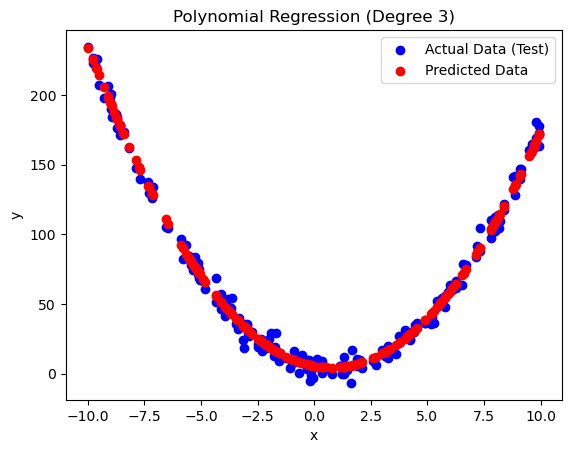

In [75]:
plt.scatter(x_test, y_test, color='blue', label='Actual Data (Test)')
plt.scatter(x_test, y_test_pred, color='red', label='Predicted Data')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()